In [1]:
from plotnine import *
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from data import *
import warnings
warnings.filterwarnings('ignore')
theme_set(theme_light())

%matplotlib inline

C:\Python\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# pg_mean= pd.read_csv("./data/pg_mean.csv")
# BOD = pd.DataFrame({"Time":[1,2,3,4,5,7],'demand':[8.3,10.3,19.0,16.0,15.6,19.8]})
# cabbage_exp = pd.read_csv("./data/cabbage_exp.csv")
# diamonds = pd.read_csv("./data/diamonds.csv")
# upc = pd.read_csv("./data/upc.csv")
# csub = pd.read_csv("./data/csub.csv")
# tophitters2001 = pd.read_csv("./data/tophitters2001.csv")
# worldpop = pd.read_csv("./data/worldpop.csv")
# ToothGrowth = pd.read_csv("./data/ToothGrowth.csv")
# uspopage = pd.read_csv("./data/uspopage.csv")
# climate = pd.read_csv("./data/climate.csv")
# heightweight = pd.read_csv("./data/heightweight.csv")
# biopsy = pd.read_csv("./data/biopsy.csv")
# faithful = pd.read_csv("./data/faithful.csv")
# countries = pd.read_csv("./data/countries.csv")
# birthwt = pd.read_csv("./data/birthwt.csv")
# birthwt['smoke1']=birthwt['smoke'].replace({0:'No Smoke',1:'Smoke'})
# countries2009 = countries.query('Year==2009 and healthexp>2000').copy()

# Summarized Data Distributions

## Histogram

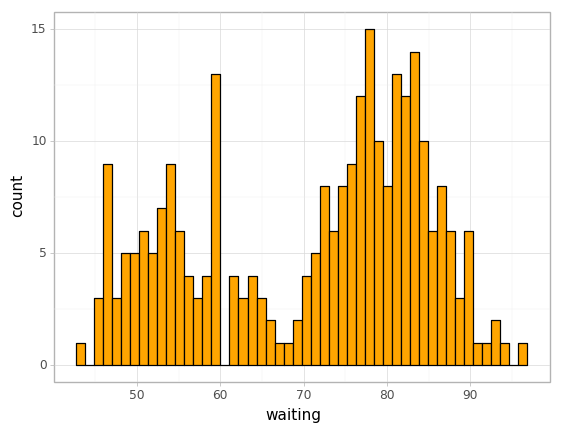

<ggplot: (-9223371881263051541)>

In [3]:
(ggplot(faithful,aes('waiting')) +
 geom_histogram(bins=50,color='black',fill='orange') # or binwidth=1
)

## Multiple Histograms from Grouped Data

In [4]:
birthwt['smoke1']=birthwt['smoke'].replace({0:'No Smoke',1:'Smoke'})

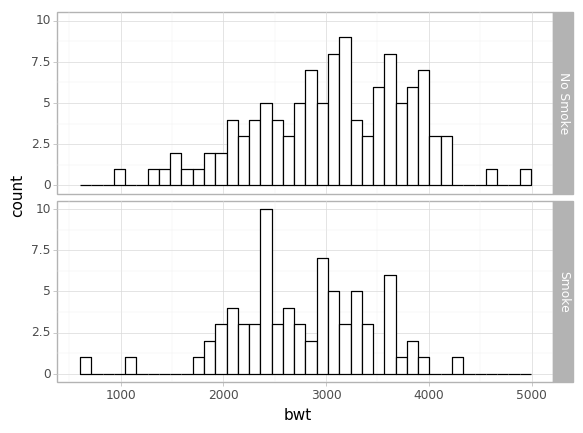

<ggplot: (155600839260)>

In [5]:
(ggplot(birthwt,aes('bwt')) +
 geom_histogram(fill='white',color='black',bins=40) +
 facet_grid('smoke1 ~ .')
)

use
scales="free". Note that this will only allow the y scales to be free—the x scales will
still be fixed because the histograms are aligned with respect to that axis:

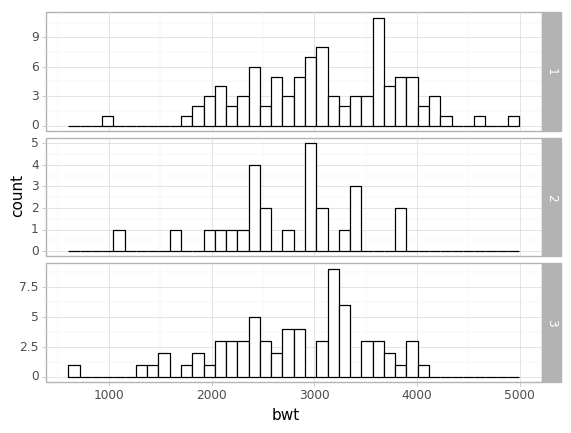

<ggplot: (155603007503)>

In [6]:
(ggplot(birthwt,aes('bwt')) +
 geom_histogram(fill='white',color='black',bins=40) +
 facet_grid('race ~ .',scales='free')
)

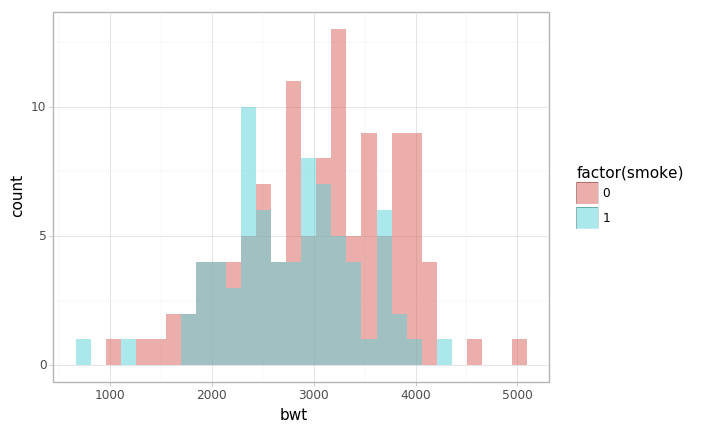

<ggplot: (-9223371881253983302)>

In [7]:
(ggplot(birthwt,aes('bwt',fill='factor(smoke)')) +
 geom_histogram(position='identity',alpha=0.5,bins=30) 
)

## Density Curve

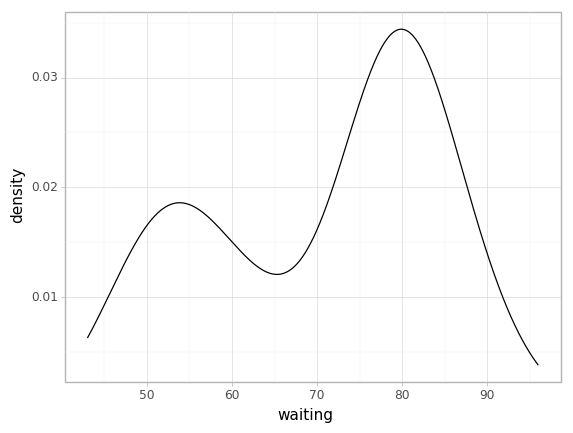

<ggplot: (-9223371881251650963)>

In [8]:
(ggplot(faithful,aes('waiting')) +
 geom_line(stat='density') 
)

 kernel density curve is an estimate of the population distribution, based on the sample data.  
   
The amount of smoothing depends on the kernel bandwidth: **the larger the bandwidth, the more smoothing there is.  **
  
The bandwidth can be set with the adjust parameter, which has a default value of 1. Figure 6-8 shows what happens with a smaller andlarger value of adjust:

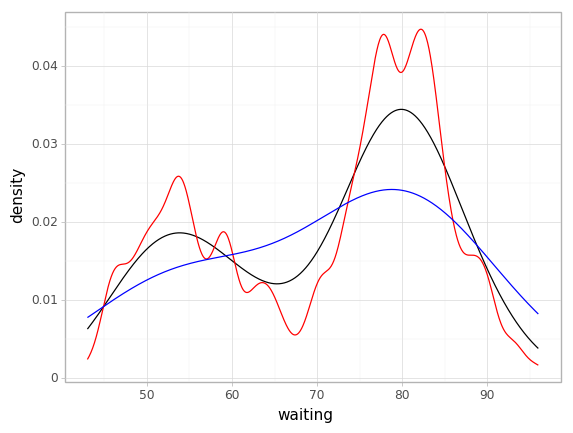

<ggplot: (155603233484)>

In [9]:
(ggplot(faithful,aes('waiting')) +
 geom_line(stat='density') + # default adjust=1
 geom_line(stat="density", adjust=.25, colour="red") +
 geom_line(stat="density", adjust=2, colour="blue")
)

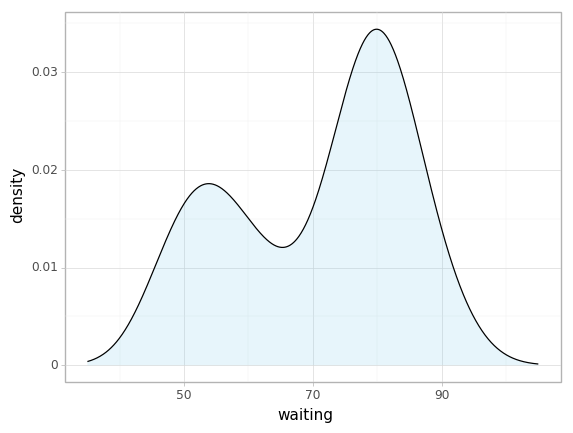

<ggplot: (-9223371881251592988)>

In [10]:
(ggplot(faithful,aes('waiting')) +
 geom_density(fill='skyblue',color=None,alpha=0.2) +
 geom_line(stat='density') +
 xlim(35,105)
)

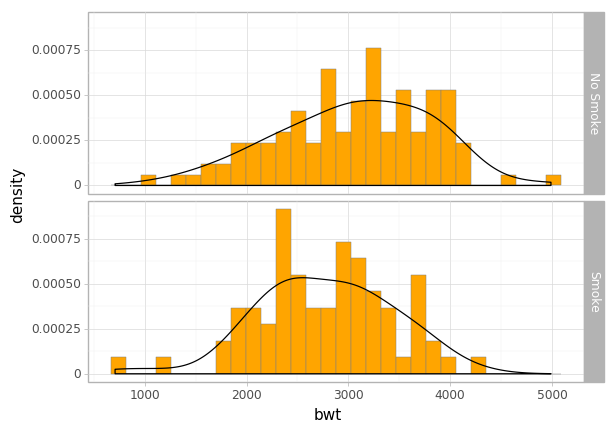

<ggplot: (155603219376)>

In [11]:
(ggplot(birthwt,aes('bwt',y='..density..')) +
 geom_histogram(fill="orange", colour="grey", size=.2,bins=30) +
 geom_density() +
 facet_grid('smoke1 ~ .')
)

When use geom_denity, be careful of the difference between color and fill.

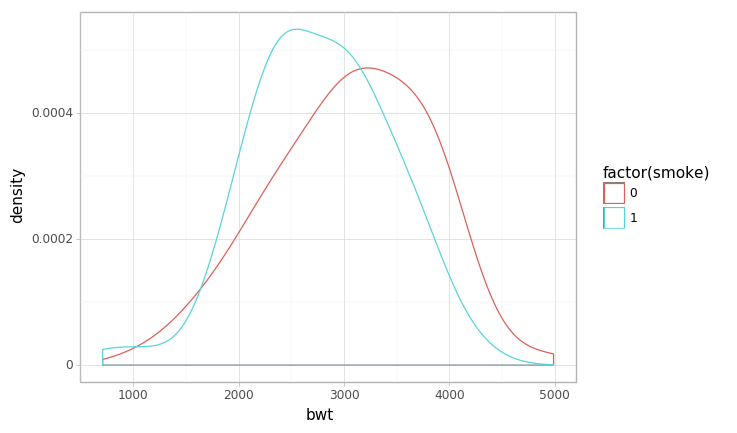

<ggplot: (155603219453)>

In [12]:
(ggplot(birthwt, aes(x='bwt', color='factor(smoke)')) + 
 geom_density()
)

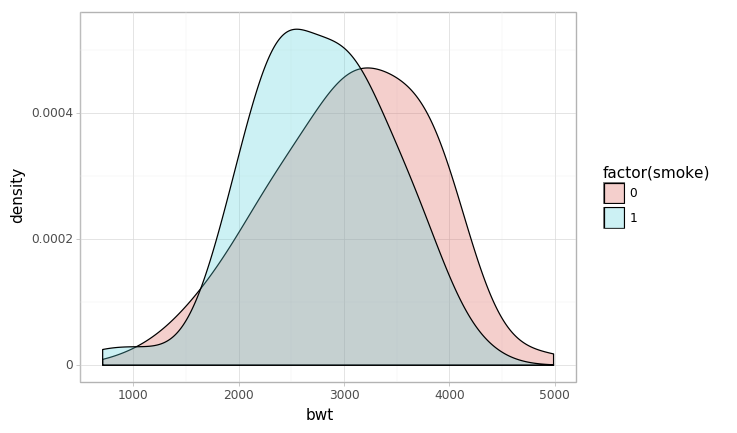

<ggplot: (-9223371881250328071)>

In [13]:
(ggplot(birthwt, aes(x='bwt', fill='factor(smoke)')) + 
 geom_density(alpha=0.3)
)

## Frequency Polygon

Frequency polygons are a graphical device for understanding the shapes of distributions. They serve the same purpose as histograms, but are especially helpful for comparing sets of data. Frequency polygons are also a good choice for displaying cumulative frequency distributions  
_**for group data**_

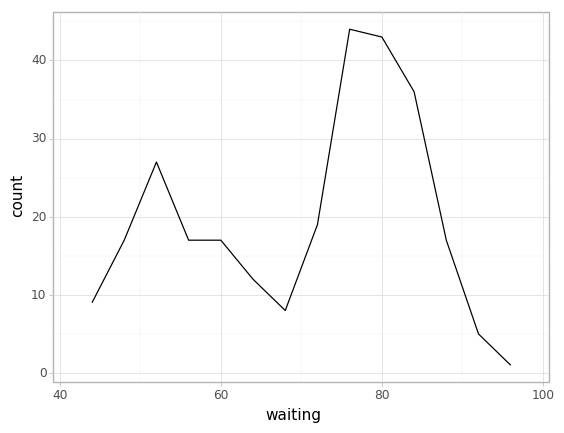

<ggplot: (-9223371881250175386)>

In [14]:
(ggplot(faithful,aes('waiting')) +
 geom_freqpoly(binwidth=4)
)

## Box Plot

Use geom_boxplot(), mapping a continuous variable to y and a discrete variable to x  
add notches to a box plot to assess whether the medians are different.

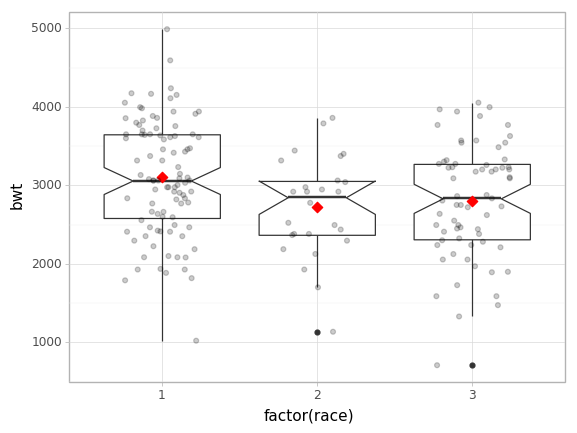

<ggplot: (155604624676)>

In [15]:
(ggplot(birthwt, aes(x='factor(race)', y='bwt')) + 
 geom_boxplot(notch=True) +
 stat_summary(fun_y= np.mean,geom= "point", shape ='D',size=2.5,color = 'red',fill = 'red') +
 geom_jitter(alpha = .2,width=0.25) 
)

## Violin Plot

make a violin plot to compare density estimates of different groups.

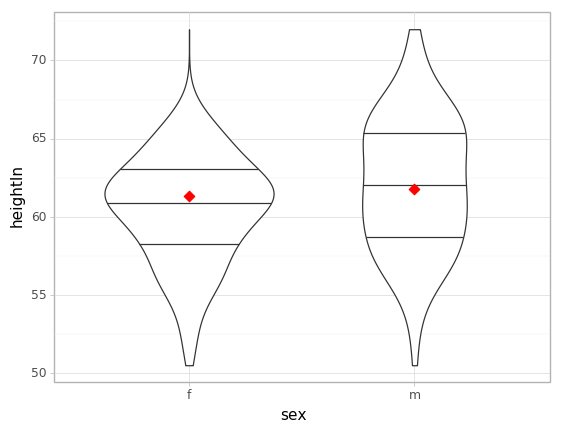

<ggplot: (155604665983)>

In [16]:
(ggplot(heightweight, aes(x='sex', y='heightIn')) +
 geom_violin(trim=False,draw_quantiles=[0.25,0.5,0.75],width=0.75) + # trim=False to keep the tail
 stat_summary(fun_y= np.median,geom= "point", shape ='D',size=2.5,color = 'red',fill = 'red') 
)

kernel density can be adjust by bandwidth --- adjust parameter

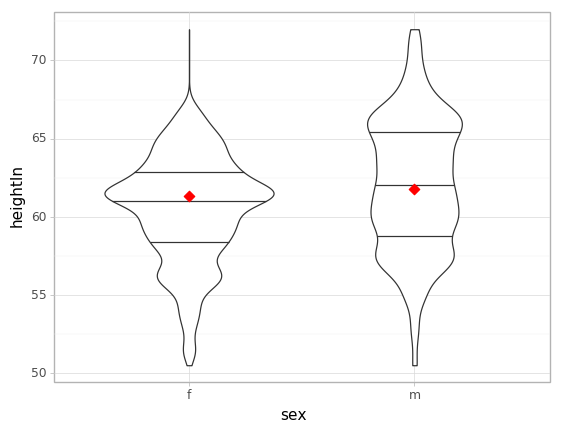

<ggplot: (-9223371881249985550)>

In [17]:
(ggplot(heightweight, aes(x='sex', y='heightIn')) +
 geom_violin(trim=False,draw_quantiles=[0.25,0.5,0.75],width=0.75,adjust=0.5) + # trim=False to keep the tail
 stat_summary(fun_y= np.median,geom= "point", shape ='D',size=2.5,color = 'red',fill = 'red') 
)

## Dot Plot

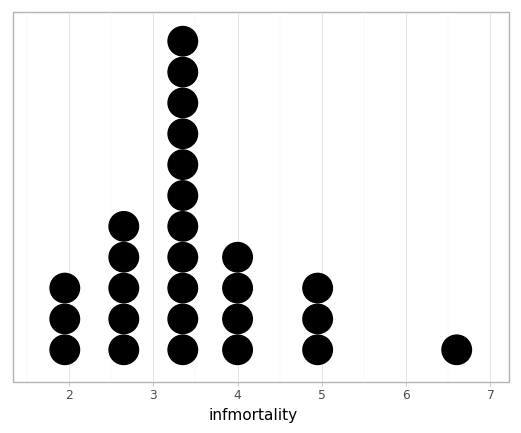

<ggplot: (-9223371881249950667)>

In [18]:
(ggplot(countries2009,aes('infmortality')) +
 geom_dotplot(dotsize=0.5,stackratio=1.05) +
 scale_y_continuous(breaks=None) + # hide y-ticks
 theme(axis_title_y=element_blank()) # hide y-label
)

## Multiple Dot Plots for Grouped Data

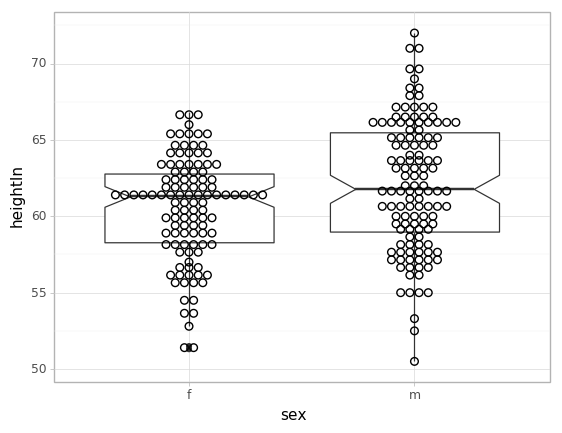

<ggplot: (155604786636)>

In [19]:
(ggplot(heightweight, aes(x='sex', y='heightIn')) +
  geom_boxplot(notchwidth=0.7,notch=True) +
 geom_dotplot(binaxis="y", binwidth=.5, stackdir="center",stackratio=1.2,fill=None) 
)

## Two-Dimensional Density Plot -- not available  geom_density2d()